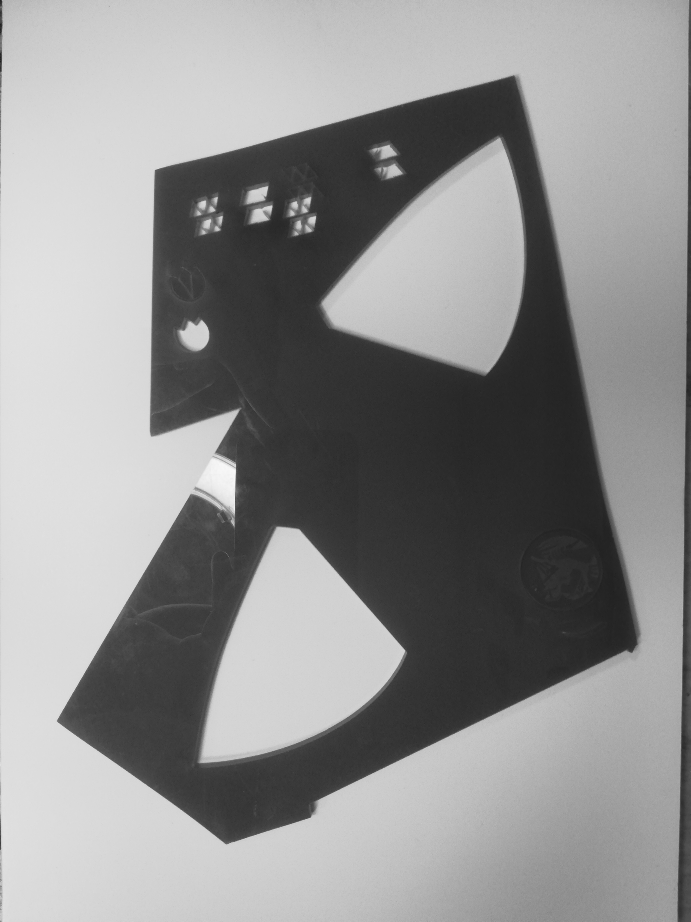

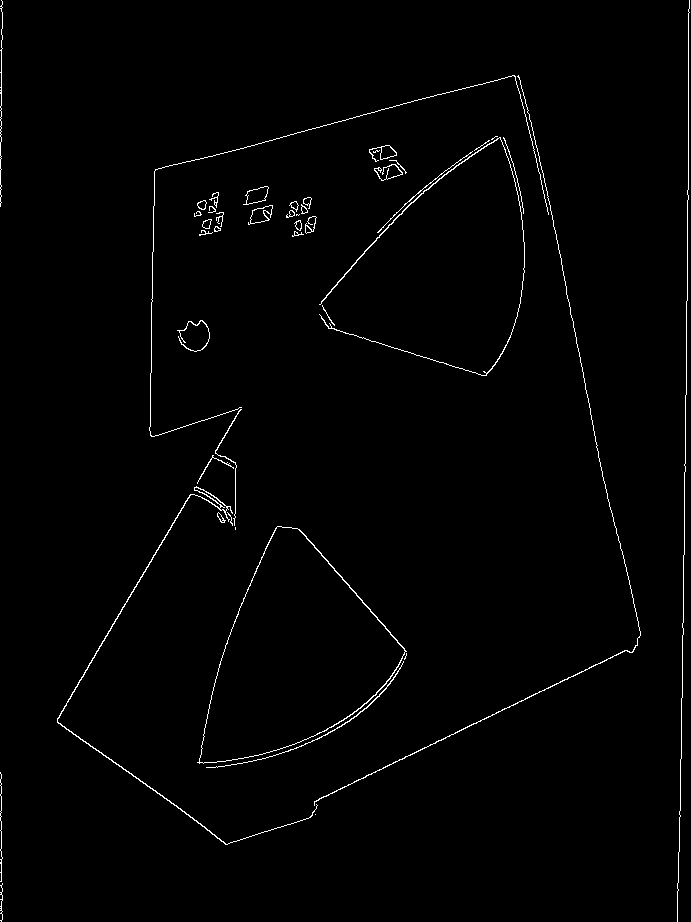

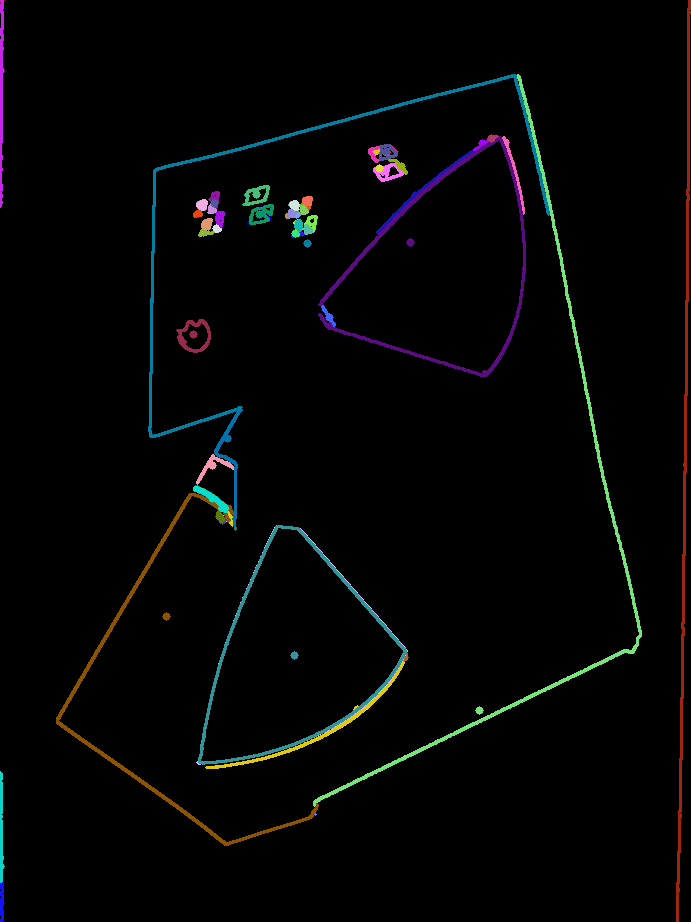

 * Contour[0] - Area (M_00) = 6.00 - Area OpenCV: 6.00 - Length: 96.43
 * Contour[1] - Area (M_00) = 0.00 - Area OpenCV: 0.00 - Length: 0.00
 * Contour[2] - Area (M_00) = 4.00 - Area OpenCV: 4.00 - Length: 238.23
 * Contour[3] - Area (M_00) = 66.50 - Area OpenCV: 66.50 - Length: 495.77
 * Contour[4] - Area (M_00) = 1.00 - Area OpenCV: 1.00 - Length: 13.66
 * Contour[5] - Area (M_00) = 0.00 - Area OpenCV: 0.00 - Length: 4.00
 * Contour[6] - Area (M_00) = 28199.00 - Area OpenCV: 28199.00 - Length: 725.78
 * Contour[7] - Area (M_00) = 27996.50 - Area OpenCV: 27996.50 - Length: 718.36
 * Contour[8] - Area (M_00) = 4.00 - Area OpenCV: 4.00 - Length: 31.80
 * Contour[9] - Area (M_00) = 35.00 - Area OpenCV: 35.00 - Length: 28.97
 * Contour[10] - Area (M_00) = 4.00 - Area OpenCV: 4.00 - Length: 7.66
 * Contour[11] - Area (M_00) = 24.00 - Area OpenCV: 24.00 - Length: 22.97
 * Contour[12] - Area (M_00) = 426.50 - Area OpenCV: 426.50 - Length: 1436.94
 * Contour[13] - Area (M_00) = 110.50 - Area 

In [7]:
import numpy as np
import cv2 as cv # OpenCV library
from google.colab.patches import cv2_imshow # colab-specific function 
import random as rng 

img = cv.imread("nobg_plastic.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.blur(img_gray, (3,3))
img_blur = cv.resize(img_blur,None,fx=0.2, fy=0.2, interpolation = cv.INTER_CUBIC) # scaled down x0.2

cv2_imshow(img_blur)

low_threshold = 70 # pixel value 
ratio = 3

canny_output = cv.Canny(img_blur, low_threshold, low_threshold * ratio)
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE,)
cv2_imshow(canny_output)


# erode = cv.erode(canny_output, (5,5), iterations = 1)
# grad = cv.morphologyEx(erode, cv.MORPH_GRADIENT, (3,3), iterations=1)
# close = cv.morphologyEx(grad, cv.MORPH_CLOSE, (5,5), iterations=1)
# cv2_imshow(erode)
# cv2_imshow(grad)
# cv2_imshow(close)


# Get the moments
mu = [None]*len(contours)
for i in range(len(contours)):
  mu[i] = cv.moments(contours[i])

# Get the mass centers
mc = [None]*len(contours)
for i in range(len(contours)):
  # add 1e-5 to avoid division by zero
  mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))


# Draw contours
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
for i in range(len(contours)):
  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
  cv.drawContours(drawing, contours, i, color, 2)
  cv.circle(drawing, (int(mc[i][0]), int(mc[i][1])), 4, color, -1)
    
cv2_imshow(drawing)

# here we calc area for every contour found in the image
for i in range(len(contours)):
  print(' * Contour[%d] - Area (M_00) = %.2f - Area OpenCV: %.2f - Length: %.2f' % (i, mu[i]['m00'], cv.contourArea(contours[i]), cv.arcLength(contours[i], True)))
